In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv("kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21613, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


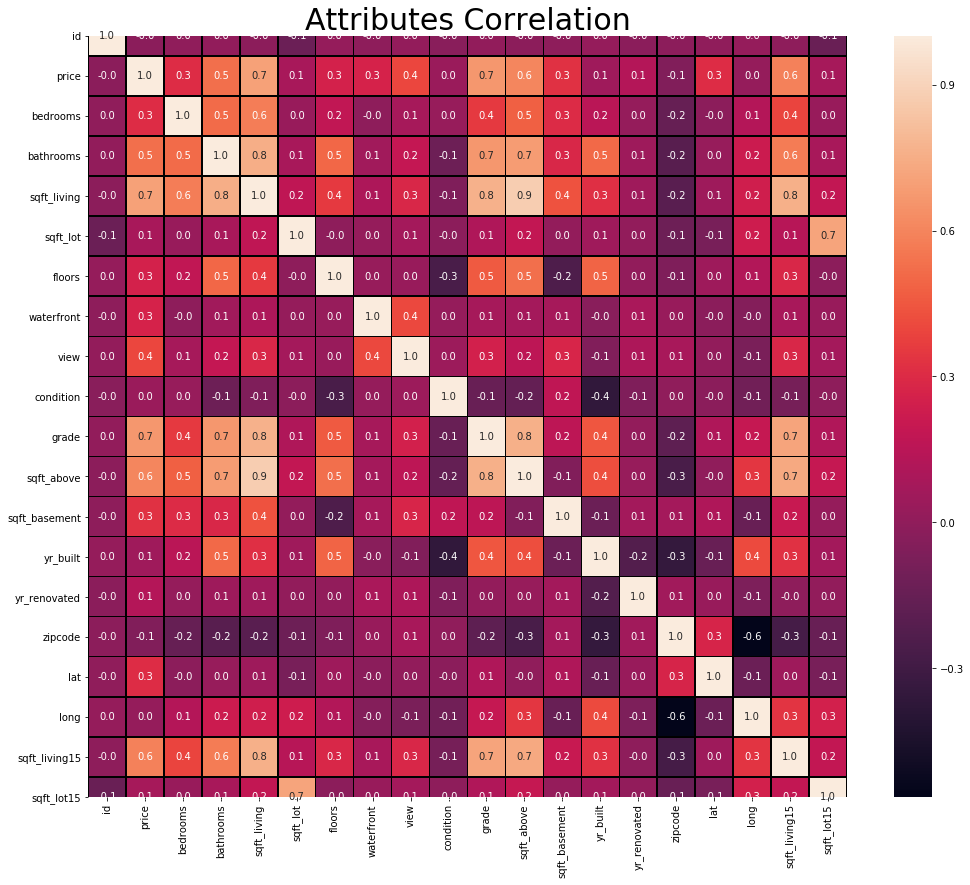

In [7]:
plt.subplots(figsize=(17,14))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor="Black",fmt="1.1f")
plt.title("Attributes Correlation",fontsize=30)
plt.show()

In [8]:
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [9]:
hist1=[go.Histogram(x=df.grade,marker=dict(color="rgb(102,0,102)"))]
histlayout1=go.Layout(title="Grade Counts of Houses",xaxis=dict(title="Graes"),yaxis=dict(title="Counts"))
histfig1=go.Figure(data=hist1,layout=histlayout1)
iplot(histfig1)

In [11]:
hist2=[go.Histogram(x=df.yr_built,xbins=dict(start=np.min(df.yr_built),size=1,
                                            end=np.max(df.yr_built)),marker=dict(color="rgb(0,102,0)"))]
histlayout2=go.Layout(title="Built Year Counts of Houses",xaxis=dict(title="Years"),yaxis=dict(title="Built Counts"))
histfig2=go.Figure(data=hist2,layout=histlayout2)
iplot(histfig2)

In [12]:
v1=[go.Box(y=df.price,name="Price Distribution of Houses",marker=dict(color="rgb(64,64,64,0.9)"),hoverinfo="name+y")]
layout1=go.Layout(title="Price")
fig1=go.Figure(data=v1,layout=layout1)
iplot(fig1)

In [14]:
v21=[go.Box(y=df.bedrooms,name="Bedrooms",marker=dict(color="rgba(51,0,0,0.9)"),hoverinfo="name+y")]
v22=[go.Box(y=df.bathrooms,name="Bathrooms",marker=dict(color="rgba(0,102,102,0.9)"),hoverinfo="name+y")]
v23=[go.Box(y=df.floors,name="Floors",marker=dict(color="rgba(204,0,102,0.9)"),hoverinfo="name+y")]
layout2=go.Layout(title="Bedrooms,Bathrooms and Floors",yaxis=dict(range=[0,13]))
fig2=go.Figure(data=v21+v22+v23,layout=layout2)
iplot(fig2)

In [16]:
#Simple Linear Regression
X=df[["sqft_living15"]]
y=df.price.values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [17]:
from sklearn.linear_model import LinearRegression
modelLR=LinearRegression()
modelLR.fit(X_train,y_train)
Y_pred=modelLR.predict(X_test)
modelLR.score(X_test,y_test)

0.3515694251158374

In [18]:
#Multiple Linear Regression
new_df = df[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','lat','waterfront','yr_built','bedrooms']]
X=new_df.values
y=df.price.values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [19]:
from sklearn.linear_model import LinearRegression
modelLR=LinearRegression()
modelLR.fit(X_train,y_train)
Y_pred=modelLR.predict(X_test)
modelLR.score(X_test,y_test)

0.6818436851448002

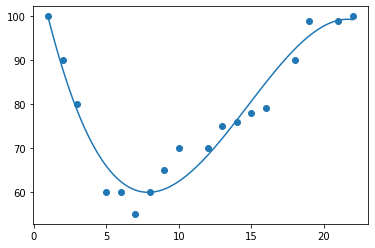

In [21]:
#Polynomial Regression
X1 = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y1 = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]
mymodel=np.poly1d(np.polyfit(X1,y1,3))
myline=np.linspace(1,22,100)
plt.scatter(X1,y1)
plt.plot(myline,mymodel(myline))
plt.show()

In [22]:
speed=mymodel(17)
print(speed)

88.87331269697987


In [23]:
#Decision Tree Regression
new_df = df[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','lat','waterfront','yr_built','bedrooms']]
X = new_df.values
y = df.price.values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3,random_state=1)

In [24]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=0)
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_test)
dtr.score(X_test,y_test)

0.6554457750473986

In [26]:
#Support Vector Regression
new_df = df[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','lat','waterfront','yr_built','bedrooms']]
X = new_df.values
y = df.price.values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3,random_state=1)

In [28]:
from sklearn.svm import SVR
svr_linear=SVR(kernel="linear")
svr_linear.fit(X_train,y_train)
y_pred=dtr.predict(X_test)
svr_linear.score(X_test,y_test)

0.504434278300271

In [29]:
#XGboost Regression
new_df = df[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','lat','waterfront','yr_built','bedrooms']]
X = new_df.values
y = df.price.values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3,random_state=1)

In [30]:
import xgboost
xgb=xgboost.XGBRegressor(n_estimators=100,learning_rate=0.08,gamma=0,subsample=0.75,colsample_bytree=1,max_depth=7)
xgb.fit(X_train,y_train)
predictions=xgb.predict(X_test)
xgb.score(X_test,y_test)

0.83404904750367

In [31]:
#Lasso Regression
new_df = df[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','lat','waterfront','yr_built','bedrooms']]
X = new_df.values
y = df.price.values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3,random_state=1)

In [32]:
from sklearn.linear_model import Lasso
clf=Lasso(alpha=50)
clf.fit(X_train,y_train)
Y=clf.predict(X_test)
clf.score(X_test,y_test)

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 66835307425479.56, tolerance: 190066807305.47772



0.6818208914928907